In [1]:
import numpy as np
import xarray as xr
from modules.integrator import forward_euler_final
from modules.classes import Quantity2D, Analytic, Interpolate
from modules.tests import plot_mass_conservation
import matplotlib.pyplot as plt

# Initialize a constant diffusion coefficient function
diffusion = Analytic(lambda x, y: x*y)
diffusion.set_partial_x(lambda x, y: y)
diffusion.set_partial_y(lambda x, y: x)

In [2]:
#case witht the D=0
diffusion = Analytic(lambda x, y: 1)
diffusion.set_partial_x(lambda x, y: 0) #setting our dx and dy is 0
diffusion.set_partial_y(lambda x, y: 0)

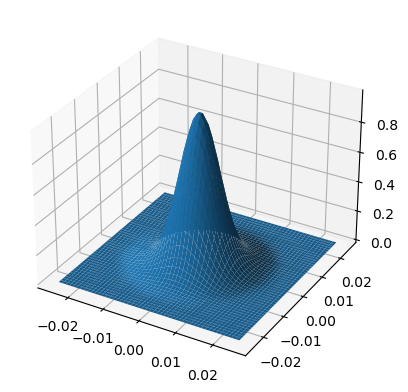

In [3]:
#giving smooth initial condition

n_grid = 50
n_time = 400
dt = 0.000001
dx = 0.001
dy = 0.001

conc = Quantity2D(
    n_grid,
    n_time,
    (-0.5*n_grid*dx, 0.5*n_grid*dx),
    (-0.5*n_grid*dy, 0.5*n_grid*dy),
    (0, dt*n_time),
)

xcoords = conc.xcoords
ycoords = conc.ycoords
X, Y = np.meshgrid(xcoords, ycoords)
initial_condition =  1*np.exp(- (X**2 + Y**2)/(0.001*dx*n_grid))
#initial_condition = np.empty_like(X)
#initial_condition[n_grid//2, n_grid//2] = 100

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, initial_condition)

In [10]:
result_ds = forward_euler_final(conc, diffusion, initial_condition)
result_ds

xr.plot.contourf(result_ds1.isel(t=40), levels=50)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.50626666e-10 3.86747123e-10 ... 3.86747123e-10
  1.50626666e-10 0.00000000e+00]
 [0.00000000e+00 3.86747123e-10 9.92781207e-10 ... 9.92781207e-10
  3.86747123e-10 0.00000000e+00]
 ...
 [0.00000000e+00 3.86747123e-10 9.92781207e-10 ... 9.92781207e-10
  3.86747123e-10 0.00000000e+00]
 [0.00000000e+00 1.50626666e-10 3.86747123e-10 ... 3.86747123e-10
  1.50626666e-10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.91783677e-10 5.19014105e-10 ... 5.19014105e-10
  1.91783677e-10 0.00000000e+00]
 [0.00000000e+00 5.19014105e-10 1.40063546e-09 ... 1.40063546e-09
  5.19014105e-10 0.00000000e+00]
 ...
 [0.00000000e+00 5.19014105e-10 1.40063546e-09 ... 1.40063546e-09
  5.19014105e-10 0.00000000e+00]

NameError: name 'result_ds1' is not defined

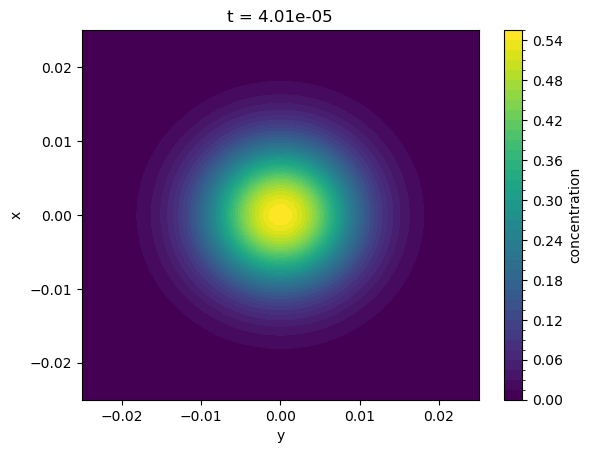

In [5]:
xr.plot.contourf(result_ds.isel(t=40), levels=50)

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

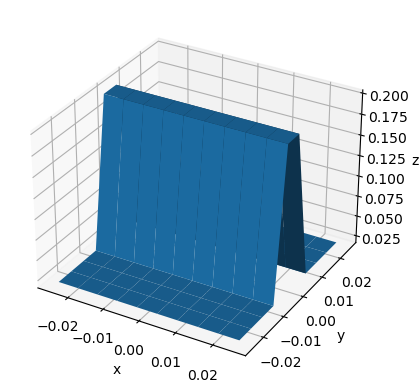

In [6]:
diffarr = 0.02*np.ones((10, 10))
diffarr[:,4:-4] = 0.2 # Vary along x; partial_x should be constant
xint = np.linspace(-0.5*n_grid*dx, 0.5*n_grid*dx, 10)
yint = np.linspace(-0.5*n_grid*dy, 0.5*n_grid*dy, 10)
diffusion1 = Interpolate(diffarr, xint, yint, s=0)

diffusion1.plot_2D(func='func')

In [11]:
result_ds1 = forward_euler_final(conc, diffusion1, initial_condition)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.02987572e-10 2.68368528e-10 ... 2.69888576e-10
  1.03604405e-10 0.00000000e+00]
 [0.00000000e+00 2.68772349e-10 7.00309858e-10 ... 7.01105833e-10
  2.69095355e-10 0.00000000e+00]
 ...
 [0.00000000e+00 2.69095355e-10 7.01105833e-10 ... 7.00309858e-10
  2.68772349e-10 0.00000000e+00]
 [0.00000000e+00 1.03604405e-10 2.69888576e-10 ... 2.68368528e-10
  1.02987572e-10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.03104759e-10 2.69134615e-10 ... 2.72180687e-10
  1.04442560e-10 0.00000000e+00]
 [0.00000000e+00 2.69957381e-10 7.04155341e-10 ... 7.05740213e-10
  2.70653748e-10 0.00000000e+00]
 ...
 [0.00000000e+00 2.70653748e-10 7.05740213e-10 ... 7.04155341e-10
  2.69957381e-10 0.00000000e+00]

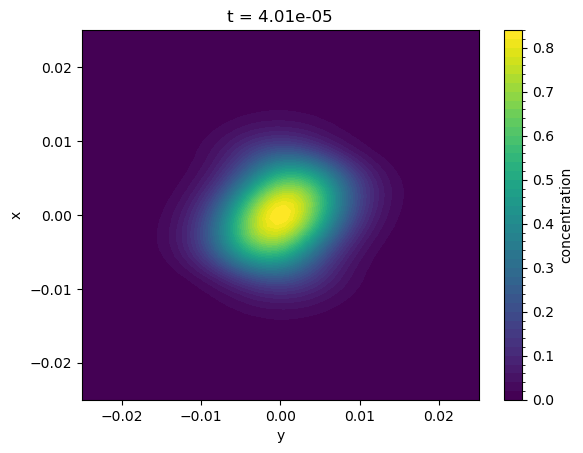

In [12]:
xr.plot.contourf(result_ds1.isel(t=40), levels=50)

2.2951098532436995e-05
3.801649542471878e-05
3.910815135056223e-05
4.032740562320357e-05
4.1670345980860476e-05
4.313417168900828e-05
4.471702630914702e-05
4.6417859658552046e-05
4.823631367022421e-05
5.0172627853445185e-05
5.222756085560195e-05
5.440232527291896e-05
5.669853338149937e-05
5.911815188467854e-05
6.166346411738829e-05
6.433703842845386e-05
6.714170168988255e-05
7.008051706820671e-05
7.315676534481967e-05
7.637392919643606e-05
7.973567994852321e-05
8.324586639797804e-05
8.690850536986426e-05
9.072777372941997e-05
9.470800161702391e-05
9.885366671217524e-05
0.0001031693893642653
0.00010765992845419302
0.00011233017787267327
0.00011718516351920082
0.00012223004074071384
0.0001274700921415737
0.00013291072570698634
0.00013855747319078038
0.00014441598872583087
0.00015049204762160773
0.00015679154531854112
0.00016332049647328756
0.00017008503415269288
0.00017709140911738923
0.00018434598917862696
0.00019185525861420546
0.000199625817631295
0.0002076643818655846
0.0002159777819

(0.0, 2.0)

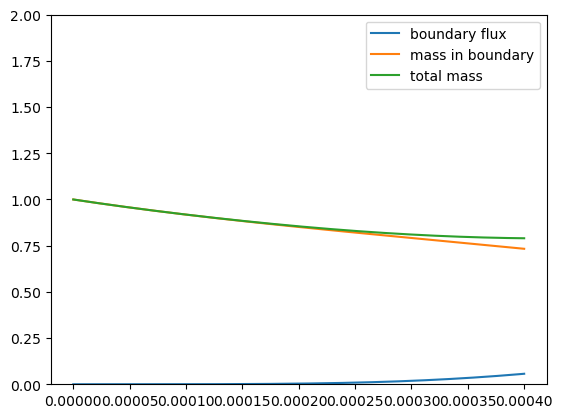

In [14]:
FIG, ax =plot_mass_conservation(result_ds1)

ax.set_ylim(0, 2)
